In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit


file1 = pd.read_csv('data_exp_142694-v7_task-62kk.csv')
file2 = pd.read_csv('data_exp_142694-v7_task-n95h.csv')

print(file1.shape, file2.shape )

ids = file2['Participant Private ID'].unique()

IDs = ids[~np.isnan(ids)]
print(IDs)

(1028, 61) (1032, 61)
[9668756. 9693321.]


In [2]:

# Initialize an empty dictionary to store DataFrames for each subject
merged_dataframes = {}

combined_dataframe = pd.DataFrame(columns=['Subject', 'Response', 'Spreadsheet: Audio1', 'Spreadsheet: Audio2'])
# Loop through each subject
for subject in IDs:
    # Load the CSV file for the current subject
    data1 = file1[file1['Participant Private ID'] == subject]
    # Filter rows where "Object Name" is equal to "Slider"
    slider_rows_data = data1[data1['Object Name'] == 'Slider']
    # Extract the desired columns
    response_column_data = slider_rows_data['Response']
    audio1_column_data = slider_rows_data['Spreadsheet: Audio1'].str[:-13]
    audio2_column_data = slider_rows_data['Spreadsheet: Audio2'].str[:-13]
    # Create a new DataFrame with the extracted columns
    new_dataframe_data = pd.DataFrame({
        'Response': response_column_data,
        'Spreadsheet: Audio1': audio1_column_data,
        'Spreadsheet: Audio2': audio2_column_data,
        'Subject' : subject
    })
    new_dataframe_data['Response'] = pd.to_numeric(new_dataframe_data['Response'], errors='coerce')
    # Remove the last 13 characters from the 'Spreadsheet: Audio1' column
#     new_dataframe_data['Spreadsheet: Audio1'] = new_dataframe_data['Spreadsheet: Audio1'].str[:-13]
#     new_dataframe_data['Spreadsheet: Audio2'] = new_dataframe_data['Spreadsheet: Audio2'].str[:-13]
    # Convert the "Response" column to numeric

    ## Load the CSV file for the current subject
    data2 = file2[file2['Participant Private ID'] == subject]
    # Filter rows where "Object Name" is equal to "Slider"
    slider_rows_data2 = data2[data2['Object Name'] == 'Slider']
    # Extract the desired columns
    response_column_data2 = slider_rows_data2['Response']
    audio1_column_data2 = slider_rows_data2['Spreadsheet: Audio1'].str[:-13]
    audio2_column_data2 = slider_rows_data2['Spreadsheet: Audio2'].str[:-13]

    # Create a new DataFrame with the extracted columns
    new_dataframe_data2 = pd.DataFrame({
        'Response': response_column_data2,
        'Spreadsheet: Audio1': audio1_column_data2,
        'Spreadsheet: Audio2': audio2_column_data2,
        'Subject' : subject
    })
    new_dataframe_data2['Response'] = pd.to_numeric(new_dataframe_data2['Response'], errors='coerce')
    # Remove the last 13 characters from the 'Spreadsheet: Audio1' column
#     new_dataframe_data2['Spreadsheet: Audio1'] = new_dataframe_data2['Spreadsheet: Audio1'].str[:-13]
#     new_dataframe_data2['Spreadsheet: Audio2'] = new_dataframe_data2['Spreadsheet: Audio2'].str[:-13]
        # Convert the "Response" column to numeric

    # Merge the two DataFrames
    merged_dataframe = pd.concat([new_dataframe_data, new_dataframe_data2], ignore_index=True)
    
    # Store the DataFrame for the current subject in the dictionary
    combined_dataframe = pd.concat([combined_dataframe, merged_dataframe], ignore_index=True)
    
# Extract unique names and remove the last 13 characters
unique_file_names = merged_dataframe['Spreadsheet: Audio1'].unique()
unique_file_names2 = merged_dataframe['Spreadsheet: Audio2'].unique()
# Concatenate and convert to a numpy array
merged_filenames = np.concatenate((unique_file_names, unique_file_names2), axis=None)
# Find the unique names using numpy
unique_names = np.unique(merged_filenames)
print(unique_names, len(unique_names))

# Create a mapping dictionary from unique names to integers
name_to_integer_mapping = {name: index for index, name in enumerate(unique_names)}

# Replace the names in the DataFrame with integers
combined_dataframe['Spreadsheet: Audio1'] = combined_dataframe['Spreadsheet: Audio1'].replace(name_to_integer_mapping)
combined_dataframe['Spreadsheet: Audio2'] = combined_dataframe['Spreadsheet: Audio2'].replace(name_to_integer_mapping)

# Print the updated DataFrames for each subject
combined_dataframe.head(5000)


['NC-off_SNR0_F-M' 'NC-off_SNR0_F-S' 'NC-off_SNR0_S-MS' 'NC-off_SNR10_F-M'
 'NC-off_SNR10_F-S' 'NC-off_SNR10_S-MS' 'NC-on_SNR0_F-M' 'NC-on_SNR0_F-S'
 'NC-on_SNR0_S-MS' 'NC-on_SNR10_F-M' 'NC-on_SNR10_F-S' 'NC-on_SNR10_S-MS'] 12


,Subject,Response,Spreadsheet: Audio1,Spreadsheet: Audio2
0,9668756.0,57,0,1
1,9668756.0,54,0,2
2,9668756.0,71,0,3
3,9668756.0,95,0,4
4,9668756.0,75,0,5
...,...,...,...,...
275,9693321.0,25,10,11
276,9693321.0,0,0,0
277,9693321.0,5,3,3
278,9693321.0,45,6,6


In [ ]:
# Now, filter the DataFrame to get rows where 'Spreadsheet: Audio1' equals 'Spreadsheet: Audio2'
filtered_df = combined_dataframe[combined_dataframe['Spreadsheet: Audio1'] == combined_dataframe['Spreadsheet: Audio2']]

# This is your new DataFrame with the filtered rows
print(filtered_df)

(264, 4)
2


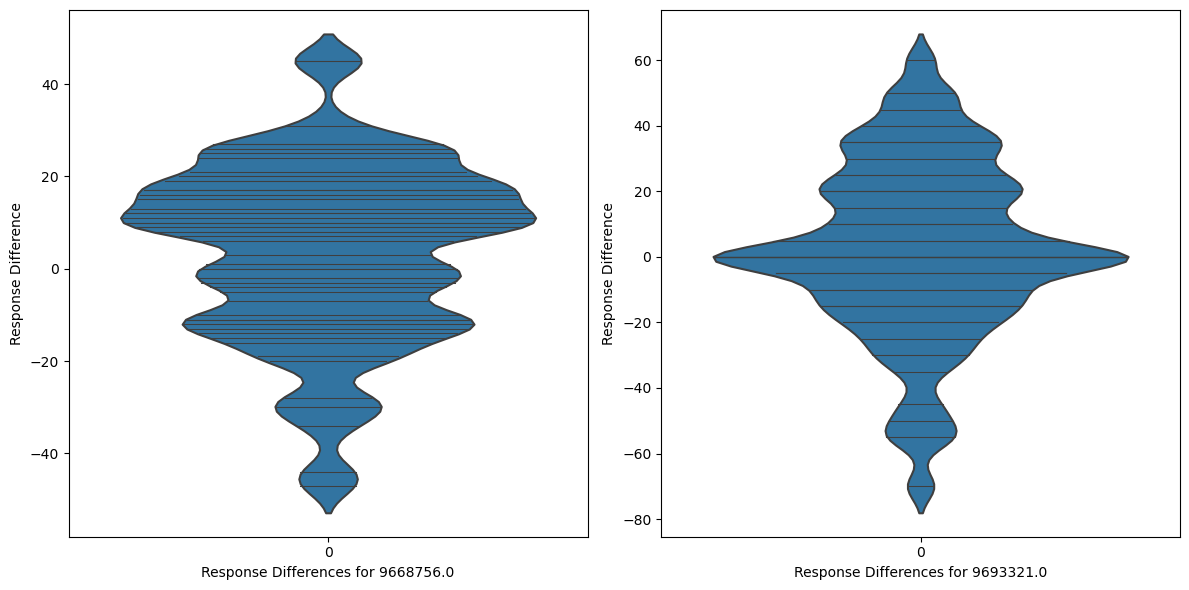

,Subject,Audio0_Audio1_Diff,Audio0_Audio2_Diff,Audio0_Audio3_Diff,Audio0_Audio4_Diff,Audio0_Audio5_Diff,Audio0_Audio6_Diff,Audio0_Audio7_Diff,Audio0_Audio8_Diff,Audio0_Audio9_Diff,...,Audio7_Audio8_Diff,Audio7_Audio9_Diff,Audio7_Audio10_Diff,Audio7_Audio11_Diff,Audio8_Audio9_Diff,Audio8_Audio10_Diff,Audio8_Audio11_Diff,Audio9_Audio10_Diff,Audio9_Audio11_Diff,Audio10_Audio11_Diff
0,9668756.0,-4.0,15.0,6.0,26.0,31.0,10.0,21.0,-11.0,27.0,...,-10.0,-5.0,-30.0,17.0,9.0,12.0,-44.0,-14.0,45.0,20.0
1,9693321.0,-15.0,35.0,45.0,-10.0,5.0,5.0,-30.0,35.0,5.0,...,50.0,35.0,30.0,50.0,20.0,-55.0,0.0,-10.0,0.0,10.0


In [3]:
MDS_df = combined_dataframe[combined_dataframe['Spreadsheet: Audio1'] != combined_dataframe['Spreadsheet: Audio2']]
print(MDS_df.shape)
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Subject'])

# Iterate over unique subjects
for subject in IDs:
    subject_data = MDS_df[MDS_df['Subject'] == subject]
    
    unique_combinations = subject_data[['Spreadsheet: Audio1', 'Spreadsheet: Audio2']].drop_duplicates()

    # Iterate over unique combinations of 'Spreadsheet: Audio1' and 'Spreadsheet: Audio2'
    for index, row in unique_combinations.iterrows():
        audio1 = row['Spreadsheet: Audio1']
        audio2 = row['Spreadsheet: Audio2']
        
        # Find rows with the same combination of 'Spreadsheet: Audio1' and 'Spreadsheet: Audio2'
        matching_rows = subject_data[(subject_data['Spreadsheet: Audio1'] == audio1) & (subject_data['Spreadsheet: Audio2'] == audio2)]
        
        if len(matching_rows) == 2:  # Check if there are exactly two matching rows
            # Calculate the difference between the first and second 'Response' values
            response_difference = matching_rows.iloc[0]['Response'] - matching_rows.iloc[1]['Response']
            
            # Store the result in a new column named after the combination
            column_name = f'Audio{audio1}_Audio{audio2}_Diff'
            results_df.at[subject, column_name] = response_difference
        else:
            print('error')

# Reset the index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Add the 'Subject' column to the results DataFrame
results_df['Subject'] = IDs

# Create a violin plot for each subject
plt.figure(figsize=(12, 6))
print(len(IDs))
for s, subject in enumerate(IDs):
    subject_data = results_df[results_df['Subject'] == subject].values
    # print(subject_data)
    
    plt.subplot(1, len(IDs), s + 1)  # Create subplots for each subject
    sns.violinplot(data=subject_data[0,1:], inner='stick',bw=0.15,)
    
    plt.xlabel(f'Response Differences for {subject}')
    plt.ylabel('Response Difference')


plt.tight_layout()

plt.show()

# Display the results
results_df.head(66)


In [4]:
MDS_df = combined_dataframe[combined_dataframe['Spreadsheet: Audio1'] != combined_dataframe['Spreadsheet: Audio2']]
print(MDS_df.shape)

# Initialize the distance matrix as a zeros matrix
D = np.zeros((12, 12))

# Iterate through the rows of the DataFrame
for index, row in MDS_df.iterrows():
    x = int(row['Spreadsheet: Audio1'])
    y = int(row['Spreadsheet: Audio2'])
    distance = int(row['Response'])/100
 
    # Update the distance matrix
    D[x, y] = D[x, y] + distance
    D[y, x] = D[y, x] + distance

print("normalize with", len(MDS_df))
# Normalize the distance matrix
D /= len(MDS_df)

# Now, 'D' is your distance matrix in Python.
print(D)


(264, 4)
normalize with 264
[[0.         0.00768939 0.00484848 0.00912879 0.01227273 0.01
  0.00912879 0.00473485 0.00545455 0.01174242 0.01170455 0.01344697]
 [0.00768939 0.         0.00416667 0.01306818 0.00712121 0.00818182
  0.01223485 0.00643939 0.00541667 0.01371212 0.01170455 0.00863636]
 [0.00484848 0.00416667 0.         0.00897727 0.00965909 0.0067803
  0.01083333 0.01083333 0.00503788 0.01409091 0.01102273 0.01140152]
 [0.00912879 0.01306818 0.00897727 0.         0.00746212 0.00594697
  0.00382576 0.00651515 0.00700758 0.00367424 0.00640152 0.00700758]
 [0.01227273 0.00712121 0.00965909 0.00746212 0.         0.00454545
  0.00837121 0.00738636 0.00537879 0.0117803  0.00541667 0.00579545]
 [0.01       0.00818182 0.0067803  0.00594697 0.00454545 0.
  0.0082197  0.00632576 0.00382576 0.01026515 0.00829545 0.00469697]
 [0.00912879 0.01223485 0.01083333 0.00382576 0.00837121 0.0082197
  0.         0.00590909 0.00469697 0.00787879 0.01064394 0.00772727]
 [0.00473485 0.00643939 0.010

NameError: name 'S' is not defined

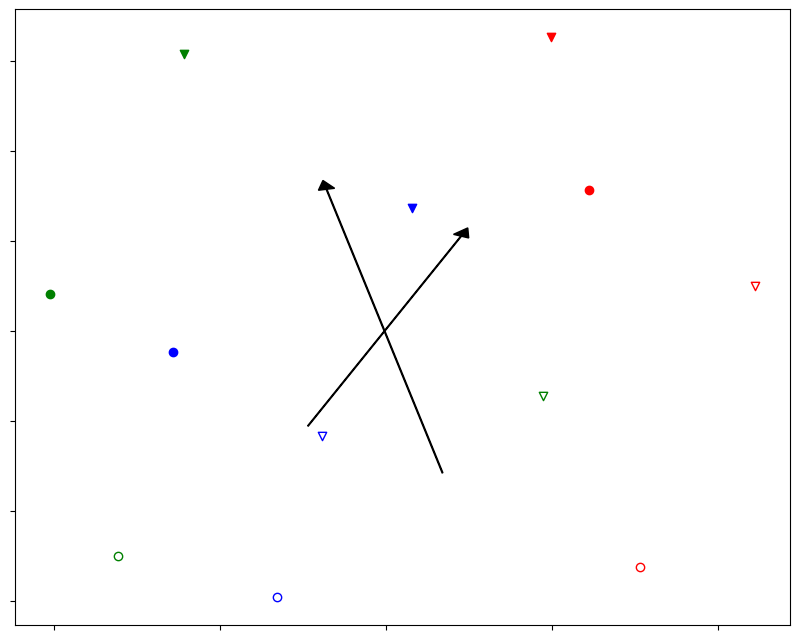

In [6]:


# Create a DataFrame to store point characteristics
characteristics = {
    'Point': range(12),
    'Category': ['NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-on', 'NC-on', 'NC-on', 'NC-on', 'NC-on', 'NC-on'],
    'SNR': [0, 0, 0, 10, 10, 10, 0, 0, 0, 10, 10, 10],
    'Type': ['F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS']
}

characteristics_df = pd.DataFrame(characteristics)

# Initialize MDS for 2D projection
mds_2d = MDS(n_components=2,
    metric=False,
    max_iter=8000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=42,
    n_jobs=-1,
    n_init=1000,
    normalized_stress="auto")

# Fit the data and obtain the 2D projection
proj_2d = mds_2d.fit_transform(D)

# Create a color map for the different types
type_colors = {'F-M': 'red', 'F-S': 'green', 'S-MS': 'blue'}

# Create markers based on Category and SNR
markers = {
    ('NC-off', 0): 'o',  # Circle marker
    ('NC-on', 0): 'v',   # Triangle marker
    ('NC-off', 10): 'o',  # Circle marker
    ('NC-on', 10): 'v'   # Circle marker
}

# Create a figure and axes for the 2D plot
fig, ax = plt.subplots(figsize=(10, 8))
# To remove x-axis tick labels
ax.set_xticklabels([])
# To remove y-axis tick labels
ax.set_yticklabels([])
for index, row in characteristics_df.iterrows():
    category = row['Category']
    snr = row['SNR']
    type = row['Type']
    
    marker = markers.get((category, snr), 'o')  # Default to circle marker
    color = type_colors[type]

    # If SNR type, use an empty marker
    if snr > 0:
        
        plt.scatter(proj_2d[index, 0], proj_2d[index, 1], c=color, marker=marker, label=f'{category} - {type}')
    else:
        plt.scatter(proj_2d[index, 0], proj_2d[index, 1], edgecolor=color, marker=marker, facecolors='white', label=f'{category} - {type}')

# Center of mass for NR Off
triangle_com = proj_2d[0:6].mean(axis=0)
# Center of mass for NR On
circle_com = proj_2d[6:].mean(axis=0)

# Center of mass for SNR=0
empty_com = proj_2d[[0,1,2,6,7,8],:].mean(axis=0)
# Center of mass for SNR=10
filled_com = proj_2d[[3,4,5,9,10,11],:].mean(axis=0)


# Calculate the arrow positions
x1, y1 = triangle_com
x2, y2 = circle_com
x3, y3 = empty_com
x4, y4 = filled_com

# Create a scatter plot with points
#plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4], marker='*', color='black', label='Center of Mass')

# Add arrows from triangle_com to circle_com and from empty_com to filled_com
plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.02, head_length=0.02, fc='black', ec='black', label='Arrow 1')
plt.arrow(x3, y3, x4 - x3, y4 - y3, head_width=0.02, head_length=0.02, fc='black', ec='black', label='Arrow 2')

# Add labels for the points
plt.text(x1, y1, 'NR-OFF', fontsize=11, ha='right')
plt.text(x2, y2, 'NR-ON', fontsize=11, ha='right')
plt.text(x3, y3, 'SNR=0dB', fontsize=11, ha='right')
plt.text(x4, y4, 'SNR=10dB', fontsize=11, ha='right')


plt.show()


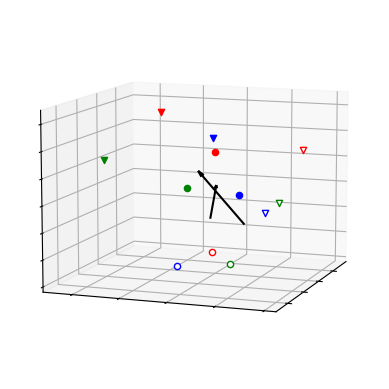

In [9]:


# Create a DataFrame to store point characteristics
characteristics = {
    'Point': range(12),
    'Category': ['NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-on', 'NC-on', 'NC-on', 'NC-on', 'NC-on', 'NC-on'],
    'SNR': [0, 0, 0, 10, 10, 10, 0, 0, 0, 10, 10, 10],
    'Type': ['F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS']
}

characteristics_df = pd.DataFrame(characteristics)

# Initialize MDS for 2D projection
mds_2d = MDS(n_components=3,
    metric=False,
    max_iter=8000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=42,
    n_jobs=-1,
    n_init=1000,
    normalized_stress="auto")

# Fit the data and obtain the 2D projection
proj_2d = mds_2d.fit_transform(D)

# Create a color map for the different types
type_colors = {'F-M': 'red', 'F-S': 'green', 'S-MS': 'blue'}

# Create markers based on Category and SNR
markers = {
    ('NC-off', 0): 'o',  # Circle marker
    ('NC-on', 0): 'v',   # Triangle marker
    ('NC-off', 10): 'o',  # Circle marker
    ('NC-on', 10): 'v'   # Circle marker
}

# Visualize the points after MDS in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# To remove x-axis tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

for index, row in characteristics_df.iterrows():
    category = row['Category']
    snr = row['SNR']
    type = row['Type']  
    marker = markers.get((category, snr), 'o')  # Default to circle marker
    color = type_colors[type]
    # If SNR type, use an empty marker
    if snr > 0: 
        ax.scatter(proj_2d[index, 0], proj_2d[index, 1],proj_2d[index, 2], c=color, marker=marker, label=f'{category} - {type}')
    else:
        ax.scatter(proj_2d[index, 0], proj_2d[index, 1],proj_2d[index, 2], edgecolor=color, marker=marker, facecolors='white', label=f'{category} - {type}')

# Center of mass for NR Off
triangle_com = proj_2d[0:6].mean(axis=0)
# Center of mass for NR On
circle_com = proj_2d[6:].mean(axis=0)
# Center of mass for SNR=0
empty_com = proj_2d[[0,1,2,6,7,8],:].mean(axis=0)
# Center of mass for SNR=10
filled_com = proj_2d[[3,4,5,9,10,11],:].mean(axis=0)
# Calculate the arrow positions
x1, y1 , z1 = triangle_com
x2, y2 , z2 = circle_com
x3, y3 , z3 = empty_com
x4, y4 , z4 = filled_com

# Calculate the arrow vectors
dx1, dy1, dz1 = circle_com - triangle_com
dx2, dy2, dz2 = filled_com - empty_com

# Add arrows using quiver
ax.quiver(x1, y1, z1, dx1, dy1, dz1, length=np.linalg.norm([dx1, dy1, dz1]*2), arrow_length_ratio=0.1, color='black')
ax.quiver(x3, y3, z3, dx2, dy2, dz2, length=np.linalg.norm([dx2, dy2, dz2]*2), arrow_length_ratio=0.1, color='black')

ax.view_init(elev=10, azim=20) 
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


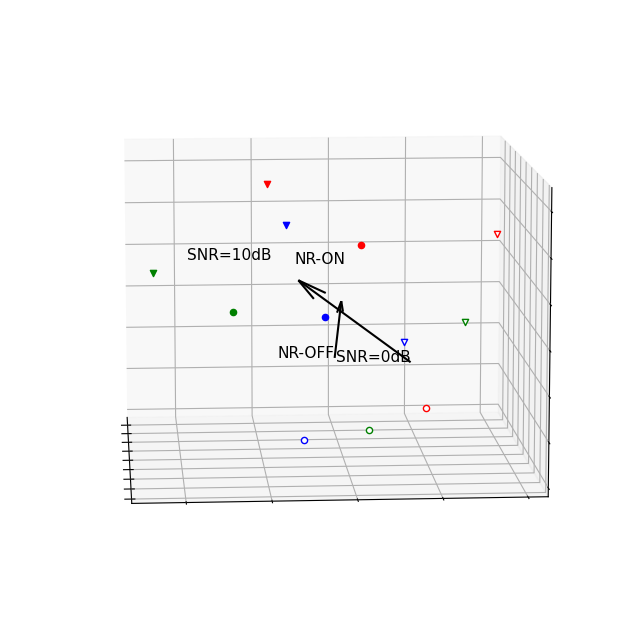

In [15]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Visualize the points after MDS in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# To remove x-axis tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

for index, row in characteristics_df.iterrows():
    category = row['Category']
    snr = row['SNR']
    type = row['Type']  
    marker = markers.get((category, snr), 'o')  # Default to circle marker
    color = type_colors[type]
    # If SNR type, use an empty marker
    if snr > 0: 
        sc = ax.scatter(proj_2d[index, 0], proj_2d[index, 1],proj_2d[index, 2], c=color, marker=marker, label=f'{category} - {type}')
    else:
        sc = ax.scatter(proj_2d[index, 0], proj_2d[index, 1],proj_2d[index, 2], edgecolor=color, marker=marker, facecolors='white', label=f'{category} - {type}')

# Center of mass for NR Off
triangle_com = proj_2d[0:6].mean(axis=0)
# Center of mass for NR On
circle_com = proj_2d[6:].mean(axis=0)
# Center of mass for SNR=0
empty_com = proj_2d[[0,1,2,6,7,8],:].mean(axis=0)
# Center of mass for SNR=10
filled_com = proj_2d[[3,4,5,9,10,11],:].mean(axis=0)
# Calculate the arrow positions
x1, y1 , z1 = triangle_com
x2, y2 , z2 = circle_com
x3, y3 , z3 = empty_com
x4, y4 , z4 = filled_com

# Calculate the arrow vectors
dx1, dy1, dz1 = circle_com - triangle_com
dx2, dy2, dz2 = filled_com - empty_com

# Add arrows using quiver
sc = ax.quiver(x1, y1, z1, dx1, dy1, dz1, length=np.linalg.norm([dx1, dy1, dz1]*2), arrow_length_ratio=0.2, color='black')
sc = ax.quiver(x3, y3, z3, dx2, dy2, dz2, length=np.linalg.norm([dx2, dy2, dz2]*2), arrow_length_ratio=0.2, color='black')
# Add labels for the points
sc = ax.text(x1, y1,z1, 'NR-OFF', fontsize=11, ha='right')
sc = ax.text(x2, y2, z2,'NR-ON', fontsize=11, ha='right')
sc = ax.text(x3, y3, z3,'SNR=0dB', fontsize=11, ha='right')
sc = ax.text(x4, y4,z4, 'SNR=10dB', fontsize=11, ha='right')

# Initialization function: plot the background of each frame
def init():
    return sc,

# Animation function: this will be called sequentially
def animate(i):
    sc = ax.view_init(elev=10, azim=i*4)  # Rotate 4 degrees per frame
    return sc,

# Animate
anim = FuncAnimation(fig, animate, init_func=init, frames=90, interval=100, blit=False)

# Save as GIF
anim.save('mds_rotation3.gif', writer='imagemagick', fps=10)

# Display the GIF
from IPython.display import Image
Image(url='mds_rotation3.gif')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Data from the table
data = {
    'WDRC_F-M': [0.060839044, 0.176040169],
    'WDRC_F-S': [0.078792288, 0.176736005],
    'WDRC_S-MS': [0.046033974, 0.125497004],
    'WDRC+NR_F-M': [0.062454168, 0.169550819],
    'WDRC+NR_F-S': [0.121783361, 0.239595619],
    'WDRC+NR_S-MS': [0.035534829, 0.099855163]
}

# Convert to a DataFrame
df = pd.DataFrame(data, index=['SNR=0', 'SNR=10'])
print(df)
print(scores)
# Flatten the DataFrame to get the scores as a list
scores = df.values.flatten()

# Calculate the dissimilarity matrix
n = len(scores)
dissimilarity_matrix = np.zeros((n, n))

# Subtract each score from every other score to get the dissimilarity
for i in range(n):
    for j in range(n):
        dissimilarity_matrix[i, j] = np.abs(scores[i] - scores[j])

# Apply Multidimensional Scaling (MDS)
print(dissimilarity_matrix)
# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2,
    metric=False,
    max_iter=1000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=42,
    n_jobs=-1,
    n_init=1000,
    normalized_stress="auto")
mds_fit = mds.fit_transform(dissimilarity_matrix)

# Create a figure and axes for the 2D plot
fig, ax = plt.subplots(figsize=(7, 7))
# To remove x-axis tick labels
ax.set_xticklabels([])
# To remove y-axis tick labels
ax.set_yticklabels([])

ax.scatter(mds_fit[:, 0], mds_fit[:, 1])

ax.set_title('2D Points after MDS')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')

characteristics = {
    'Point': range(12),
    'Category': ['NC-off', 'NC-off', 'NC-off','NC-on', 'NC-on', 'NC-on', 'NC-off', 'NC-off', 'NC-off', 'NC-on', 'NC-on', 'NC-on'],
    'SNR': [0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10],
    'Type': ['F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS']
}
for index, row in characteristics_df.iterrows():
    category = row['Category']
    snr = row['SNR']
    type = row['Type']
    
    marker = markers.get((category, snr), 'o')  # Default to circle marker
    color = type_colors[type]

    # If SNR type, use an empty marker
    if snr > 0:
        
        plt.scatter(mds_fit[index, 0], mds_fit[index, 1], c=color, marker=marker, label=f'{category} - {type}')
    else:
        plt.scatter(mds_fit[index, 0], mds_fit[index, 1], edgecolor=color, marker=marker, facecolors='white', label=f'{category} - {type}')

# Center of mass for NR Off
triangle_com = mds_fit[[0,1,2,6,7,8],:].mean(axis=0)
# Center of mass for NR On
circle_com = mds_fit[[3,4,5,9,10,11],:].mean(axis=0)
# Center of mass for SNR=0
empty_com = mds_fit[0:6].mean(axis=0)
# Center of mass for SNR=10
filled_com = mds_fit[6:].mean(axis=0)
# Calculate the arrow positions
x1, y1 = triangle_com
x2, y2 = circle_com
x3, y3 = empty_com
x4, y4 = filled_com
# Add arrows from triangle_com to circle_com and from empty_com to filled_com
plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.02, head_length=0.02, fc='black', ec='black', label='Arrow 1')
plt.arrow(x3, y3, x4 - x3, y4 - y3, head_width=0.02, head_length=0.02, fc='black', ec='black', label='Arrow 2')

# Add labels for the points
plt.text(x1, y1, 'NR-OFF', fontsize=11, ha='right')
plt.text(x2, y2, 'NR-ON', fontsize=11, ha='right')
plt.text(x3, y3, 'SNR=0dB', fontsize=11, ha='right')
plt.text(x4, y4, 'SNR=10dB', fontsize=11, ha='right')

